# Vacation Weather:
### To collect, visualize, and analyze weather data for more than 500 cities around the world
---
#### __Note__: Educational Material
- _This project is intended as reference and educational material; expect extensive code documentation_
---

In [1]:
# Import Dependencies - this is analogous setting the table with utensils and silverware before eating dinner; you're bringing the necessary tools.
import sys # Importing system-specific parameters and functions
sys.path.append('script/')  # Add the 'script/' directory to the list of paths to search for modules
try:
    import kaleido # for exporting Plotly plots to static image formats like PNG, JPEG, etc.
    print("kaleido is already installed.")
except ImportError:
    print("Installing kaleido...")
    !pip install kaleido
import matplotlib.pyplot as plt # for plotting graphs and charts. Uses [plt] as an alias.
import plotly.express as px # for making interactive, publication-quality graphs. [plotly.express] is a simpler interface. Uses [px] as an alias.
import plotly.graph_objects as go # for creating interactive visualizations with more control over the individual elements. Uses [go] as an alias.
from scipy.optimize import curve_fit # for curve fitting and parameter estimation in nonlinear regression.
import pandas as pd # for data manipulation and analysis. Uses [pd] as an alias.
import numpy as np # for numerical computations. Uses [np] as an alias.
import requests # to make HTTP requests, useful for APIs.
import time # for time-related tasks like pausing code execution.
import hvplot.pandas as hvpd # for interactive plotting directly with Pandas DataFrames, uses HoloViews for rendering. Uses [hvpd] as an alias.
import os # for interacting with the operating system. Provides functions to navigate, create, delete and modify files and directories.
from citipy import citipy # for finding the nearest city given latitude and longitude coordinates data.
from scipy.stats import linregress # for calculating linear regression
from api_keys import weather_api_key, geoapify_key  # imports both [weather_api_key] and [geoapify_key] from another Python file.

print("Dependencies installed and imported") # Confirmation that cell executed successfully

kaleido is already installed.


Dependencies installed and imported


---
### Generate a list of cities

In [2]:
# Initialize Variables
lat_lngs = [] # list for holding latitude and longitude coordinates combinations
cities = [] # list for holding cities names

# Define the range of possible latitude and longitude values
lat_range = (-90, 90) # tuple for storing lat_range as a tuple as we want this variable to be constant
lng_range = (-180, 180) # tuple for storing lng_range as a tuple as we want this variable to be constant

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) # Generates 1500 random latitude values
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) # Generates 1500 random latitude values
lat_lngs = zip(lats, lngs) # Combines two arrays ([lats] and [lngs]) into one iterable of tuple elements (e.g. -35.4, 117.2)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name # assigns the city closest to the coordinates to a variable, [city]
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---
### Use the OpenWeatherMap API to retrieve weather data from the cities in the [cities] list

In [3]:
# Initialize Variables
url = "http://api.openweathermap.org/data/2.5/weather?" # variable for the API base URl. Append to this parameters and api key.
list_city_data = [] # list for holding the weather data for each city

# Print to logger
print("Beginning Data Retrieval     ") # output aesthetic title for logging API requested data
print("-----------------------------") # output aesthetic ---- for logging API requested data

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for index, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (index % 50 == 0 and index >= 50): # This conditional if statment causes the code execution to pause for 1 second every 50 iterations
        set_count += 1
        record_count = 0
        time.sleep(1) # This helps orevent rate-limiting by the API if it has restrictions on frequency of requests

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key # variable for the API endpoint URL. Used to request the data.
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city)) # output tracking index and returned city value

    # Add 1 to the record count
    record_count += 1 # to progress iteratively through the for loop

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # variable for the retrieved data. Stored in json datatype format.

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into the [city_data] list
        list_city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------") # output aesthetic ---- for logging API requested data
print("Data Retrieval Complete      ") # output aesthetic conclusive statement for logging API requested data
print("-----------------------------") # output aesthetic ---- for logging API requested data

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | bilma
Processing Record 5 of Set 1 | saint-georges
Processing Record 6 of Set 1 | nagai
Processing Record 7 of Set 1 | christchurch
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | barcelona
Processing Record 10 of Set 1 | kroya
Processing Record 11 of Set 1 | leningradskiy
Processing Record 12 of Set 1 | praia da vitoria
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | katsuura
Processing Record 17 of Set 1 | chervone
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | fare
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | valenca

In [4]:
# Confirm [city_data] list has been populated
list_city_data # output values of [city_data] list

[{'City': 'butaritari',
  'Lat': 3.0707,
  'Lng': 172.7902,
  'Max Temp': 301.37,
  'Humidity': 77,
  'Cloudiness': 100,
  'Wind Speed': 6.83,
  'Country': 'KI',
  'Date': 1693775892},
 {'City': 'vaini',
  'Lat': -21.2,
  'Lng': -175.2,
  'Max Temp': 297.24,
  'Humidity': 94,
  'Cloudiness': 75,
  'Wind Speed': 2.57,
  'Country': 'TO',
  'Date': 1693776324},
 {'City': 'rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 292.13,
  'Humidity': 83,
  'Cloudiness': 100,
  'Wind Speed': 4.85,
  'Country': 'PF',
  'Date': 1693775888},
 {'City': 'bilma',
  'Lat': 18.6853,
  'Lng': 12.9164,
  'Max Temp': 308.18,
  'Humidity': 26,
  'Cloudiness': 61,
  'Wind Speed': 5.72,
  'Country': 'NE',
  'Date': 1693775969},
 {'City': 'saint-georges',
  'Lat': 12.0564,
  'Lng': -61.7485,
  'Max Temp': 303.97,
  'Humidity': 74,
  'Cloudiness': 40,
  'Wind Speed': 10.29,
  'Country': 'GD',
  'Date': 1693776481},
 {'City': 'nagai',
  'Lat': 38.1036,
  'Lng': 140.035,
  'Max Temp': 295.79,
  'Humidi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
df_city_data = pd.DataFrame(list_city_data) #dataframe for storing [city_data] data in a more easily data manipulated and visualized format

# Show Record Count
df_city_data.count() #confirms the number of distinct cities pulled from the API request

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [6]:
# Display sample data
df_city_data.head() # output values of [df_city_data] dataframe

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0     butaritari   3.0707  172.7902    301.37        77         100   
1          vaini -21.2000 -175.2000    297.24        94          75   
2        rikitea -23.1203 -134.9692    292.13        83         100   
3          bilma  18.6853   12.9164    308.18        26          61   
4  saint-georges  12.0564  -61.7485    303.97        74          40   

   Wind Speed Country        Date  
0        6.83      KI  1693775892  
1        2.57      TO  1693776324  
2        4.85      PF  1693775888  
3        5.72      NE  1693775969  
4       10.29      GD  1693776481

In [7]:
# Export the [df_city_data] dataframe into a csv
df_city_data.to_csv("output/cities.csv", index_label="City_ID")

# NOTE:
- to make this code platform independent, relpace these relative paths with commands from the `os` library, which ensures it will work on non Unix-based operating systems.

import os

##### Ensure the directory exists
output_dir = "../output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

##### Create the full path to the CSV file
csv_path = os.path.join(output_dir, "cities.csv")

##### Write to CSV
df_city_data.to_csv(csv_path, index_label="City_ID")


In [8]:
# Read saved data
df_city_data = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
df_city_data.head() # verifying the read in data is the same as the exported data

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
0           butaritari   3.0707  172.7902    301.37        77         100   
1                vaini -21.2000 -175.2000    297.24        94          75   
2              rikitea -23.1203 -134.9692    292.13        83         100   
3                bilma  18.6853   12.9164    308.18        26          61   
4        saint-georges  12.0564  -61.7485    303.97        74          40   

         Wind Speed Country        Date  
City_ID                                  
0              6.83      KI  1693775892  
1              2.57      TO  1693776324  
2              4.85      PF  1693775888  
3              5.72      NE  1693775969  
4             10.29      GD  1693776481

In [9]:
# Rename [df_city_data] dataframe column
df_city_data.rename(columns={'Max Temp':'Max Temp (°K)'}, inplace=True)

# Convert df_city_data[Max Temp] column temperature values from (ºK) to (ºC)
df_city_data['Max Temp (°C)'] = df_city_data['Max Temp (°K)'] - 273.15

# Create a list to store the reordered columns
list_ordered_columns = [
    'City',
    'Lat',
    'Lng',
    'Max Temp (°K)',
    'Max Temp (°C)',  # Place it next to 'Max Temp (°K)'
    'Humidity',
    'Cloudiness',
    'Wind Speed',
    'Country',
    'Date'
]

# Reorder the DataFrame columns
df_city_data = df_city_data[list_ordered_columns]


# Display sample data
df_city_data.head() # verifying the read in data is the same as the exported data

City      Lat       Lng  Max Temp (°K)  Max Temp (°C)  \
City_ID                                                                   
0           butaritari   3.0707  172.7902         301.37          28.22   
1                vaini -21.2000 -175.2000         297.24          24.09   
2              rikitea -23.1203 -134.9692         292.13          18.98   
3                bilma  18.6853   12.9164         308.18          35.03   
4        saint-georges  12.0564  -61.7485         303.97          30.82   

         Humidity  Cloudiness  Wind Speed Country        Date  
City_ID                                                        
0              77         100        6.83      KI  1693775892  
1              94          75        2.57      TO  1693776324  
2              83         100        4.85      PF  1693775888  
3              26          61        5.72      NE  1693775969  
4              74          40       10.29      GD  1693776481

### Visualize the Geographic Weather Data
---
#### Latitude Vs. Temperature
---

In [10]:
# Quadratic fit
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

params, params_covariance = curve_fit(quadratic_function, df_city_data['Lat'], df_city_data['Max Temp (°C)'])
df_city_data['Quadratic_Fit'] = quadratic_function(df_city_data['Lat'], params[0], params[1], params[2])
df_city_data['Distance from Quadratic'] = np.abs(df_city_data['Max Temp (°C)'] - df_city_data['Quadratic_Fit'])

# Scatter plot
fig = px.scatter(df_city_data, x='Lat', y='Max Temp (°C)',
                 color='Distance from Quadratic',  # New distance
                 hover_data=['City'],
                 title='City Latitude vs. Temperature',
                 labels={'Lat': 'Latitude', 'Max Temp (°C)': 'Max Temperature (°C)'}
                 )

# Quadratic regression line
x_values_poly = np.linspace(df_city_data['Lat'].min(), df_city_data['Lat'].max(), 100)
y_values_poly = quadratic_function(x_values_poly, params[0], params[1], params[2])
fig.add_trace(go.Scatter(x=x_values_poly, y=y_values_poly, mode='lines', name='2nd Order Regression Line', line=dict(color='green')))

# Legend arrangement
fig.update_layout(
    legend=dict(
        x=0.5,
        y=1.1,
        traceorder="normal",
        orientation="h"
    )
)

# Show the plot
fig.show()

# Save the figure to [.png] and [.html] files
fig.write_image("images/latitude-vs-temperature-plotly.png")
fig.write_html("images/latitude-vs-temperature-plotly.html")

# Next Steps:
- Generate plotly plots fir cloudiness and windspeed and humidity
- Add comments to all plots
- Convert Jupyter Notebook to HTMl to post on GitHub Pages (jupyter nbconvert --to html VacationWeather.ipynb --output index.html)
    - First, display the story and visualiztion results (maybe this will require JavaScript?)
- Lastly, record myself on Zoom.
- Share code and transcription to GPT4 (Maybe a plugin will help analyze it?)
- Ask for feedback
- Share (email) with Tata
- Check status of TxSt applications
- Apply to Capital Factory Dream Job
- Apply to other jobs
- Improve GitHub for 'To Show How 'To Tell a Story'' presentation
- 200 Pushups

In [11]:
df_city_data.head()

City      Lat       Lng  Max Temp (°K)  Max Temp (°C)  \
City_ID                                                                   
0           butaritari   3.0707  172.7902         301.37          28.22   
1                vaini -21.2000 -175.2000         297.24          24.09   
2              rikitea -23.1203 -134.9692         292.13          18.98   
3                bilma  18.6853   12.9164         308.18          35.03   
4        saint-georges  12.0564  -61.7485         303.97          30.82   

         Humidity  Cloudiness  Wind Speed Country        Date  Quadratic_Fit  \
City_ID                                                                        
0              77         100        6.83      KI  1693775892      27.522054   
1              94          75        2.57      TO  1693776324      20.365396   
2              83         100        4.85      PF  1693775888      19.452513   
3              26          61        5.72      NE  1693775969      27.833804   
4              74          40       10.29      GD  1693776481      28.112000   

         Distance from Quadratic  
City_ID                           
0                       0.697946  
1                       3.724604  
2                       0.472513  
3                       7.196196  
4                       2.708000

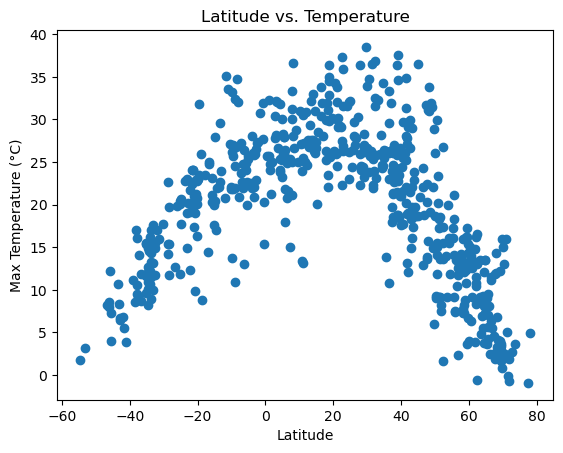

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(df_city_data['Lat'], df_city_data['Max Temp (°C)'])

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Save the figure
plt.savefig("images/latitude-vs-temperature-matplotlib.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

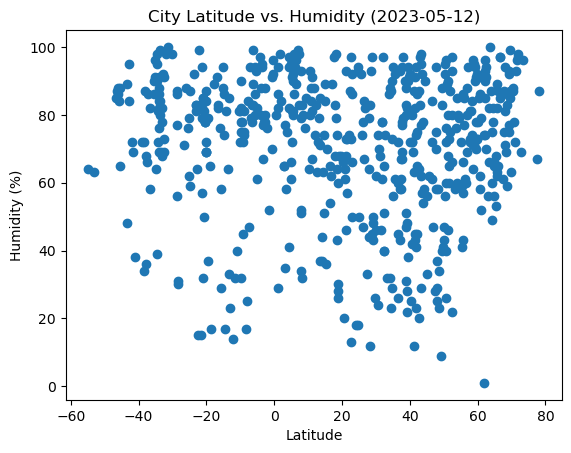

In [13]:
# Build scatter plot for latitude vs. humidity
plt.scatter(df_city_data['Lat'], df_city_data['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-05-12)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("images/latitude-vs-humidity-matplotlib.png")

# Show plot
plt.show()

---
#### Latitude Vs. Cloudiness

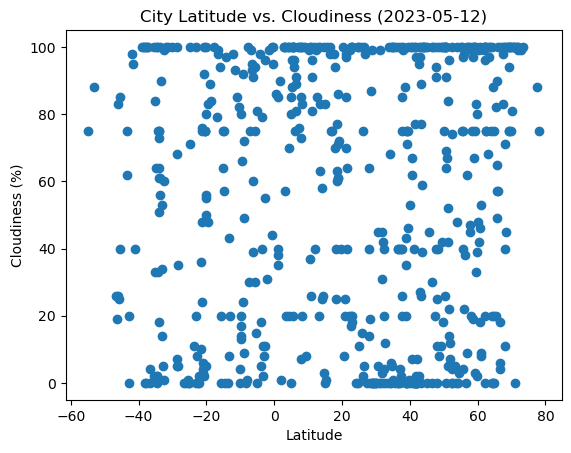

In [14]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(df_city_data['Lat'], df_city_data['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-05-12)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("images/latitude-vs-cloudiness-2023-05-12-matplotlib.png")

# Show plot
plt.show()

---
#### Latitude vs. Wind Speed Plot

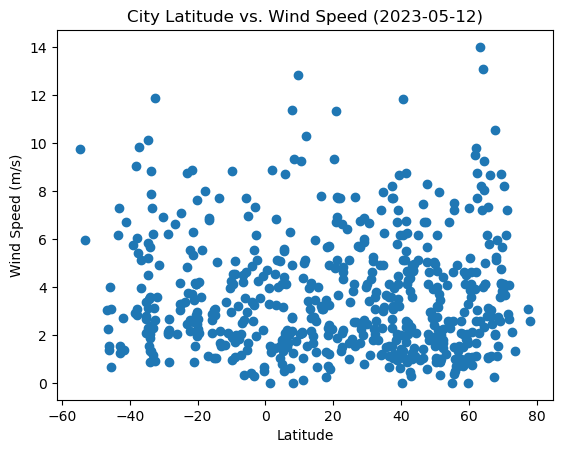

In [15]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(df_city_data['Lat'], df_city_data['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-05-12)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("images/latitude-vs-windspeed-2023-05-12-matplotlib.png")

# Show plot
plt.show()

---
## Define Function: Linear Regression

In [16]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(parameter_1, parameter_2, text_x=0.05, text_y=0.1):
    slope, intercept = np.polyfit(parameter_1, parameter_2, 1)
    r_value = np.corrcoef(parameter_1, parameter_2)[0, 1]

    plt.scatter(parameter_1, parameter_2)
    regression_line = slope * np.array(parameter_1) + intercept
    plt.plot(parameter_1, regression_line, color='red')

    plt.title('Linear Regression Plot')
    plt.xlabel('X')
    plt.ylabel('Y')

    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(text_x, text_y, equation, ha='left', va='bottom', transform=plt.gca().transAxes, fontsize=14, fontweight='normal', color='red')

    print(f'r-value: {r_value:.2f}')

    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
df_northern_hemisphere = df_city_data[df_city_data['Lat']>=0]

# Display sample data
df_northern_hemisphere.head()

City      Lat       Lng  Max Temp (°K)  Max Temp (°C)  \
City_ID                                                                   
0           butaritari   3.0707  172.7902         301.37          28.22   
3                bilma  18.6853   12.9164         308.18          35.03   
4        saint-georges  12.0564  -61.7485         303.97          30.82   
5                nagai  38.1036  140.0350         295.79          22.64   
7               albany  42.6001  -73.9662         303.04          29.89   

         Humidity  Cloudiness  Wind Speed Country        Date  Quadratic_Fit  \
City_ID                                                                        
0              77         100        6.83      KI  1693775892      27.522054   
3              26          61        5.72      NE  1693775969      27.833804   
4              74          40       10.29      GD  1693776481      28.112000   
5              97          99        1.20      JP  1693776481      23.532784   
7              64           2        0.45      US  1693776187      21.795687   

         Distance from Quadratic  
City_ID                           
0                       0.697946  
3                       7.196196  
4                       2.708000  
5                       0.892784  
7                       8.094313

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
df_southern_hemisphere = df_city_data[df_city_data['Lat']<0]

# Display sample data
df_southern_hemisphere.head()

City      Lat       Lng  Max Temp (°K)  Max Temp (°C)  \
City_ID                                                                  
1               vaini -21.2000 -175.2000         297.24          24.09   
2             rikitea -23.1203 -134.9692         292.13          18.98   
6        christchurch -43.5333  172.6333         283.89          10.74   
9               kroya  -7.6331  109.2461         294.01          20.86   
12             atuona  -9.8000 -139.0333         299.37          26.22   

         Humidity  Cloudiness  Wind Speed Country        Date  Quadratic_Fit  \
City_ID                                                                        
1              94          75        2.57      TO  1693776324      20.365396   
2              83         100        4.85      PF  1693775888      19.452513   
6              89          75        6.17      NZ  1693776336       6.606328   
9              84         100        1.84      ID  1693776482      25.366730   
12             75          13        8.85      PF  1693776483      24.738178   

         Distance from Quadratic  
City_ID                           
1                       3.724604  
2                       0.472513  
6                       4.133672  
9                       4.506730  
12                      1.481822

---
###  Temperature vs. Latitude Linear Regression Plot

r-value: -0.75


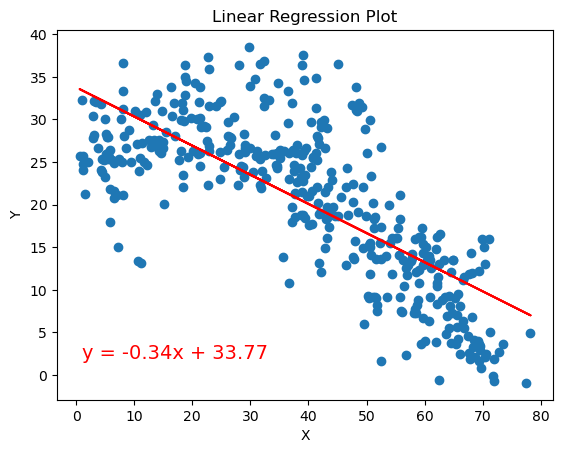

In [19]:
# Linear regression on Northern Hemisphere
x = df_northern_hemisphere['Lat']  # X-axis data (latitude)
y = df_northern_hemisphere['Max Temp (°C)']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y)

r-value: 0.81


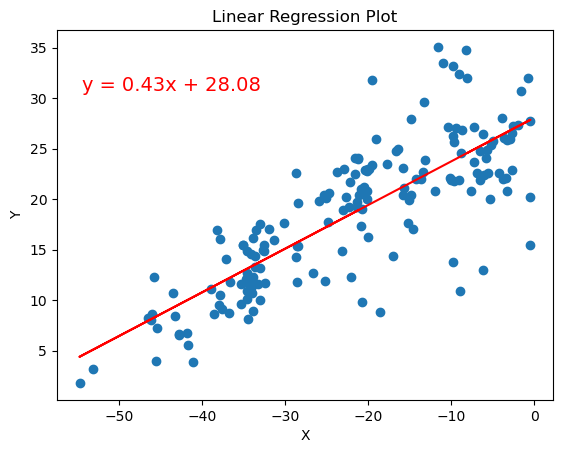

In [20]:
# Linear regression on Southern Hemisphere
x = df_southern_hemisphere['Lat']  # X-axis data (latitude)
y = df_southern_hemisphere['Max Temp (°C)']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

---
### Humidity vs. Latitude Linear Regression Plot

r-value: 0.07


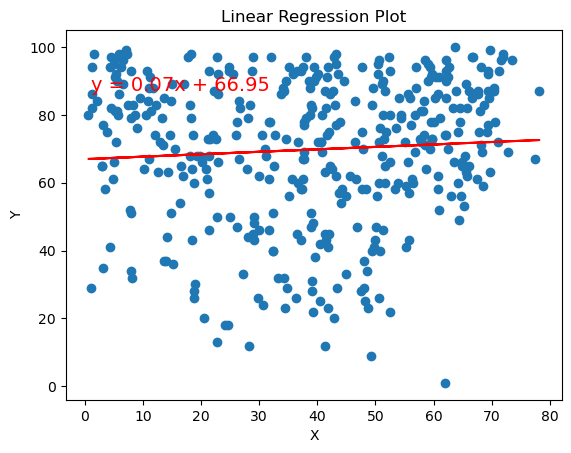

In [21]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x = df_northern_hemisphere['Lat']  # X-axis data (latitude)
y = df_northern_hemisphere['Humidity']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

r-value: -0.04


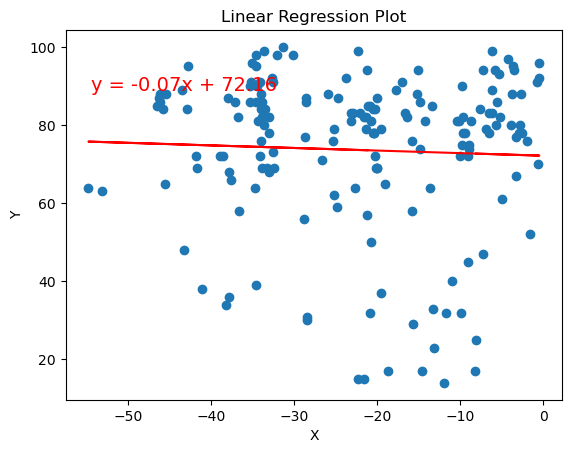

In [22]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x = df_southern_hemisphere['Lat']  # X-axis data (latitude)
y = df_southern_hemisphere['Humidity']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

---
### Cloudiness vs. Latitude Linear Regression Plot

r-value: -0.01


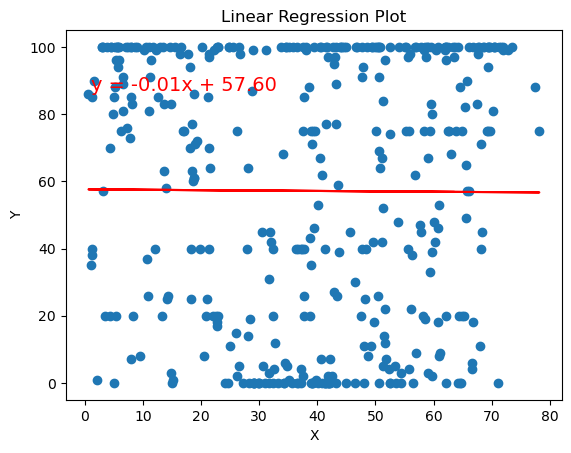

In [23]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x = df_northern_hemisphere['Lat']  # X-axis data (latitude)
y = df_northern_hemisphere['Cloudiness']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

r-value: -0.02


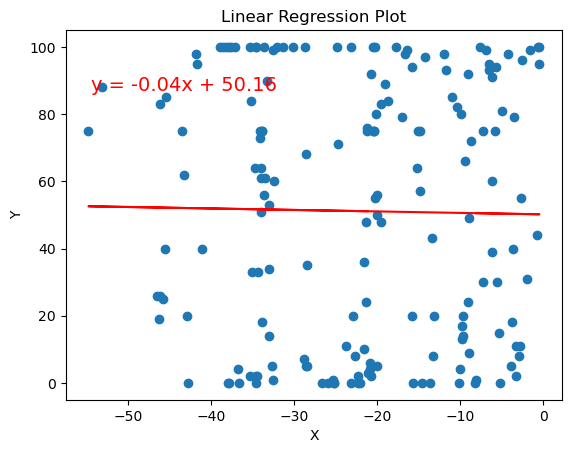

In [24]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x = df_southern_hemisphere['Lat']  # X-axis data (latitude)
y = df_southern_hemisphere['Cloudiness']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

---
### Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.02


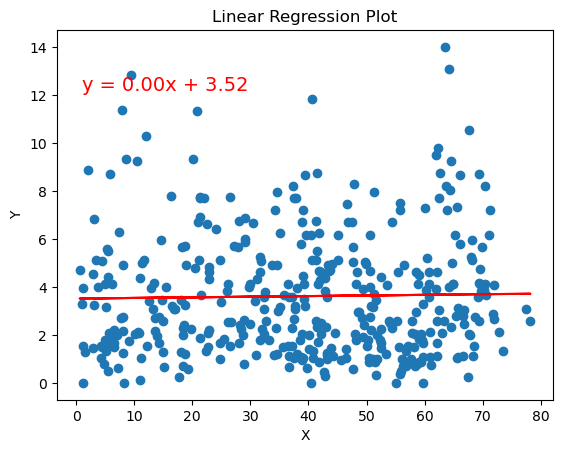

In [25]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x = df_northern_hemisphere['Lat']  # X-axis data (latitude)
y = df_northern_hemisphere['Wind Speed']  # Y-axis data (maximum temperature)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

r-value: -0.16


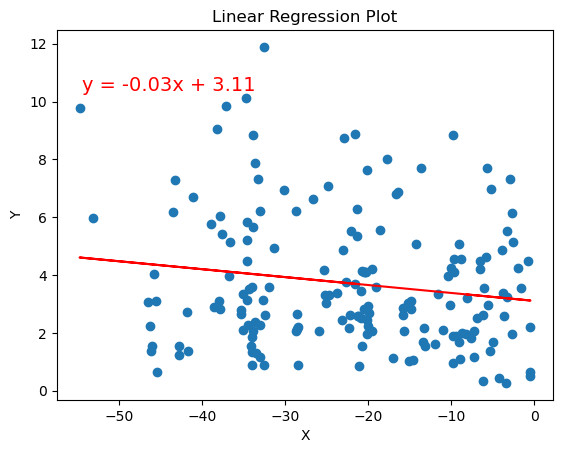

In [26]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x = df_southern_hemisphere['Lat']  # X-axis data (latitude)
y = df_southern_hemisphere['Wind Speed']  # Y-axis data (wind speed)

# Call the function to create the linear regression plot
create_linear_regression_plot(x, y, text_x=0.05, text_y=0.825)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

'Twas lovely!

---
### Step 1: Create a map that displays a point for every city in the `df_city_data` DataFrame. The size of the point should be the humidity in each city.

In [27]:
# Configure the map plot
plot_map = df_city_data.hvplot.points(
    x='Lng',
    y='Lat',
    geo=True,
    tiles='OSM',
    c='City',
    size='Humidity',
    alpha=0.7,
    legend='right',
    title='City Humidity',
    xlabel='Longitude',
    ylabel='Latitude',
    hover_cols=['City', 'Humidity'],
    frame_height=500
)

# Display the plotted map
plot_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity)

### Step 2: Narrow down the `df_city_data` DataFrame to find your ideal weather condition

In [28]:
# Ideal weather conditions temperature range
min_temp = 20  # Minimum temperature in Celsius
max_temp = 25  # Maximum temperature in Celsius

# Filter the DataFrame based on temperature range
df_ideal_conditions = df_city_data[(df_city_data['Max Temp (°C)'] >= min_temp) & (df_city_data['Max Temp (°C)'] <= max_temp)]

# Drop any rows with null values
df_ideal_conditions.dropna()

# Display sample data
df_ideal_conditions

City      Lat       Lng  Max Temp (°K)  Max Temp (°C)  \
City_ID                                                                      
1                   vaini -21.2000 -175.2000         297.24          24.09   
5                   nagai  38.1036  140.0350         295.79          22.64   
9                   kroya  -7.6331  109.2461         294.01          20.86   
11       praia da vitoria  38.7333  -27.0667         296.35          23.20   
18                   fare -16.7000 -151.0167         297.90          24.75   
...                   ...      ...       ...            ...            ...   
536           finschhafen  -6.6024  147.8681         297.96          24.81   
540             vitanesti  44.0000   25.4167         296.07          22.92   
543          dolzhanskaya  46.6311   37.8039         297.48          24.33   
548          richards bay -28.7830   32.0377         295.75          22.60   
563                xuanwu  32.0690  118.8138         297.12          23.97   

         Humidity  Cloudiness  Wind Speed Country        Date  Quadratic_Fit  \
City_ID                                                                        
1              94          75        2.57      TO  1693776324      20.365396   
5              97          99        1.20      JP  1693776481      23.532784   
9              84         100        1.84      ID  1693776482      25.366730   
11             88          20        1.10      PT  1693776482      23.306299   
18             83          98        6.81      PF  1693776484      22.305501   
...           ...         ...         ...     ...         ...            ...   
536            83          95        4.22      PG  1693776584      25.642990   
540            54         100        4.94      RO  1693776585      21.197983   
543            61         100        7.45      RU  1693776585      20.001503   
548            56           7        6.23      ZA  1693776586      16.464590   
563            97          42        2.23      CN  1693776589      25.426068   

         Distance from Quadratic  
City_ID                           
1                       3.724604  
5                       0.892784  
9                       4.506730  
11                      0.106299  
18                      2.444499  
...                          ...  
536                     0.832990  
540                     1.722017  
543                     4.328497  
548                     6.135410  
563                     1.456068  

[125 rows x 12 columns]

### Step 3: Create a new DataFrame called `df_hotel`

In [29]:
# Use the Pandas copy function to create DataFrame called df_hotel to store the city, country, coordinates, and humidity
df_hotel = df_ideal_conditions.copy()

# Set base URL for hotel search
base_url = "https://api.geoapify.com/v2/places"

# Iterate through the df_hotel DataFrame
for index, row in df_hotel.iterrows():
    # Get latitude and longitude from the DataFrame
    lat = row['Lat']
    lng = row['Lng']
    
    # Set parameters to search for a hotel
    params = {
        "text": "hotel",  # Search for hotels
        "lat": lat,  # Latitude of the location
        "lon": lng,  # Longitude of the location
        "type": "accommodation.hotel",  # Specify the type as "lodging" for hotels
        "apiKey": geoapify_key  # Replace with your actual API key
    }

    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    hotel_data = response.json()

    # Grab the first hotel from the results and store the name in the df_hotel DataFrame
    try:
        df_hotel.loc[index, "Hotel Name"] = hotel_data["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        df_hotel.loc[index, "Hotel Name"] = "No hotel found"

# Display sample data
df_hotel

City      Lat       Lng  Max Temp (°K)  Max Temp (°C)  \
City_ID                                                                      
1                   vaini -21.2000 -175.2000         297.24          24.09   
5                   nagai  38.1036  140.0350         295.79          22.64   
9                   kroya  -7.6331  109.2461         294.01          20.86   
11       praia da vitoria  38.7333  -27.0667         296.35          23.20   
18                   fare -16.7000 -151.0167         297.90          24.75   
...                   ...      ...       ...            ...            ...   
536           finschhafen  -6.6024  147.8681         297.96          24.81   
540             vitanesti  44.0000   25.4167         296.07          22.92   
543          dolzhanskaya  46.6311   37.8039         297.48          24.33   
548          richards bay -28.7830   32.0377         295.75          22.60   
563                xuanwu  32.0690  118.8138         297.12          23.97   

         Humidity  Cloudiness  Wind Speed Country        Date  Quadratic_Fit  \
City_ID                                                                        
1              94          75        2.57      TO  1693776324      20.365396   
5              97          99        1.20      JP  1693776481      23.532784   
9              84         100        1.84      ID  1693776482      25.366730   
11             88          20        1.10      PT  1693776482      23.306299   
18             83          98        6.81      PF  1693776484      22.305501   
...           ...         ...         ...     ...         ...            ...   
536            83          95        4.22      PG  1693776584      25.642990   
540            54         100        4.94      RO  1693776585      21.197983   
543            61         100        7.45      RU  1693776585      20.001503   
548            56           7        6.23      ZA  1693776586      16.464590   
563            97          42        2.23      CN  1693776589      25.426068   

         Distance from Quadratic                   Hotel Name  
City_ID                                                        
1                       3.724604  Keleti International Resort  
5                       0.892784                  ビジネスホテル 長井屋  
9                       4.506730                  Setia Hotel  
11                      0.106299                       Salles  
18                      2.444499  hôtel Maitai Lapita Village  
...                          ...                          ...  
536                     0.832990      Lae International Hotel  
540                     1.722017                   Hotel Parc  
543                     4.328497          Гостиница "Надежда"  
548                     6.135410         Bon Hotel Waterfront  
563                     1.456068                      金陵之星大酒店  

[125 rows x 13 columns]

### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates

In [30]:
# Set the search radius
radius = 10000  # 10,000 meters

# Iterate through the df_hotel DataFrame
for index, row in df_hotel.iterrows():
    # Get latitude and longitude from the DataFrame
    lat = row['Lat']
    lng = row['Lng']
    
    # Set parameters to search for a hotel
    params = {
        "text": "hotel",  # Search for hotels
        "lat": lat,  # Latitude of the location
        "lon": lng,  # Longitude of the location
        "type": "accommodation.hotel",  # Specify the type as "lodging" for hotels
        "radius": radius,  # Set the search radius
        "apiKey": geoapify_key  # Replace with your actual API key
    }

    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    hotel_data = response.json()

    # Grab the first hotel from the results and store the name in the df_hotel DataFrame
    try:
        df_hotel.loc[index, "Hotel Name"] = hotel_data["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        df_hotel.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{df_hotel.loc[index, 'City']} - nearest hotel: {df_hotel.loc[index, 'Hotel Name']}")

# Display sample data
df_hotel

vaini - nearest hotel: Keleti International Resort
nagai - nearest hotel: ビジネスホテル 長井屋
kroya - nearest hotel: Setia Hotel
praia da vitoria - nearest hotel: Salles
fare - nearest hotel: hôtel Maitai Lapita Village
thompson - nearest hotel: Thompson Inn
valenca - nearest hotel: No hotel found
sciacca - nearest hotel: Le casette di Vita
barnstaple - nearest hotel: The Royal and Fortescue Hotel
castro - nearest hotel: Hotel Central Palace
lagoa - nearest hotel: Casa da Madrinha
saint-francois - nearest hotel: Chez Lily
cao bang - nearest hotel: SONG HIEN HOTEL
huarmey - nearest hotel: Hostal Santa Rosa
pisco - nearest hotel: La Portada
the pas - nearest hotel: Wescana Inn
lata - nearest hotel: Residencial Botânico
ribeira grande - nearest hotel: Hospedaria JSF
fortuna - nearest hotel: Comfort Inn & Suites Redwood Country
bengkulu - nearest hotel: Dena Hotel
fano - nearest hotel: Tag Hotel
gbarnga - nearest hotel: Passion Hotel #2
maneadero - nearest hotel: Estero Beach Resort
sayyan - neare

City      Lat       Lng  Max Temp (°K)  Max Temp (°C)  \
City_ID                                                                      
1                   vaini -21.2000 -175.2000         297.24          24.09   
5                   nagai  38.1036  140.0350         295.79          22.64   
9                   kroya  -7.6331  109.2461         294.01          20.86   
11       praia da vitoria  38.7333  -27.0667         296.35          23.20   
18                   fare -16.7000 -151.0167         297.90          24.75   
...                   ...      ...       ...            ...            ...   
536           finschhafen  -6.6024  147.8681         297.96          24.81   
540             vitanesti  44.0000   25.4167         296.07          22.92   
543          dolzhanskaya  46.6311   37.8039         297.48          24.33   
548          richards bay -28.7830   32.0377         295.75          22.60   
563                xuanwu  32.0690  118.8138         297.12          23.97   

         Humidity  Cloudiness  Wind Speed Country        Date  Quadratic_Fit  \
City_ID                                                                        
1              94          75        2.57      TO  1693776324      20.365396   
5              97          99        1.20      JP  1693776481      23.532784   
9              84         100        1.84      ID  1693776482      25.366730   
11             88          20        1.10      PT  1693776482      23.306299   
18             83          98        6.81      PF  1693776484      22.305501   
...           ...         ...         ...     ...         ...            ...   
536            83          95        4.22      PG  1693776584      25.642990   
540            54         100        4.94      RO  1693776585      21.197983   
543            61         100        7.45      RU  1693776585      20.001503   
548            56           7        6.23      ZA  1693776586      16.464590   
563            97          42        2.23      CN  1693776589      25.426068   

         Distance from Quadratic                   Hotel Name  
City_ID                                                        
1                       3.724604  Keleti International Resort  
5                       0.892784                  ビジネスホテル 長井屋  
9                       4.506730                  Setia Hotel  
11                      0.106299                       Salles  
18                      2.444499  hôtel Maitai Lapita Village  
...                          ...                          ...  
536                     0.832990      Lae International Hotel  
540                     1.722017                   Hotel Parc  
543                     4.328497          Гостиница "Надежда"  
548                     6.135410         Bon Hotel Waterfront  
563                     1.456068                      金陵之星大酒店  

[125 rows x 13 columns]

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map

In [31]:
# Configure the map plot
plot_map_hotels = df_hotel.hvplot.points(
    x='Lng',
    y='Lat',
    geo=True,
    tiles='OSM',
    c='City',
    size='Humidity',
    alpha=0.7,
    legend='right',
    title='Hotel Locations and Humidity',
    xlabel='Longitude',
    ylabel='Latitude',
    hover_cols=['City', 'Hotel Name', 'Humidity'],
    frame_height=500
)

# Display the map
plot_map_hotels

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name)

In [32]:
# Defining functions

def create_linear_regression_plot(parameter_1, parameter_2, title, xlabel, ylabel, text_x=0.05, text_y=0.1):
    slope, intercept = np.polyfit(parameter_1, parameter_2, 1)
    r_value = np.corrcoef(parameter_1, parameter_2)[0, 1]

    plt.scatter(parameter_1, parameter_2)
    regression_line = slope * np.array(parameter_1) + intercept
    plt.plot(parameter_1, regression_line, color='red')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(text_x, text_y, equation, ha='left', va='bottom', transform=plt.gca().transAxes, fontsize=14, fontweight='normal', color='red')

    print(f'r-value: {r_value:.2f}')

def generate_plots(df, df_northern, df_southern, x_param, y_param):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    create_linear_regression_plot(df[x_param], df[y_param], f'All Data: {x_param} vs {y_param}', x_param, y_param)

    plt.subplot(1, 3, 2)
    create_linear_regression_plot(df_northern[x_param], df_northern[y_param], f'Northern Hemisphere: {x_param} vs {y_param}', x_param, y_param)

    plt.subplot(1, 3, 3)
    create_linear_regression_plot(df_southern[x_param], df_southern[y_param], f'Southern Hemisphere: {x_param} vs {y_param}', x_param, y_param)

    plt.tight_layout()
    plt.show()

r-value: -0.17
r-value: -0.75
r-value: 0.81


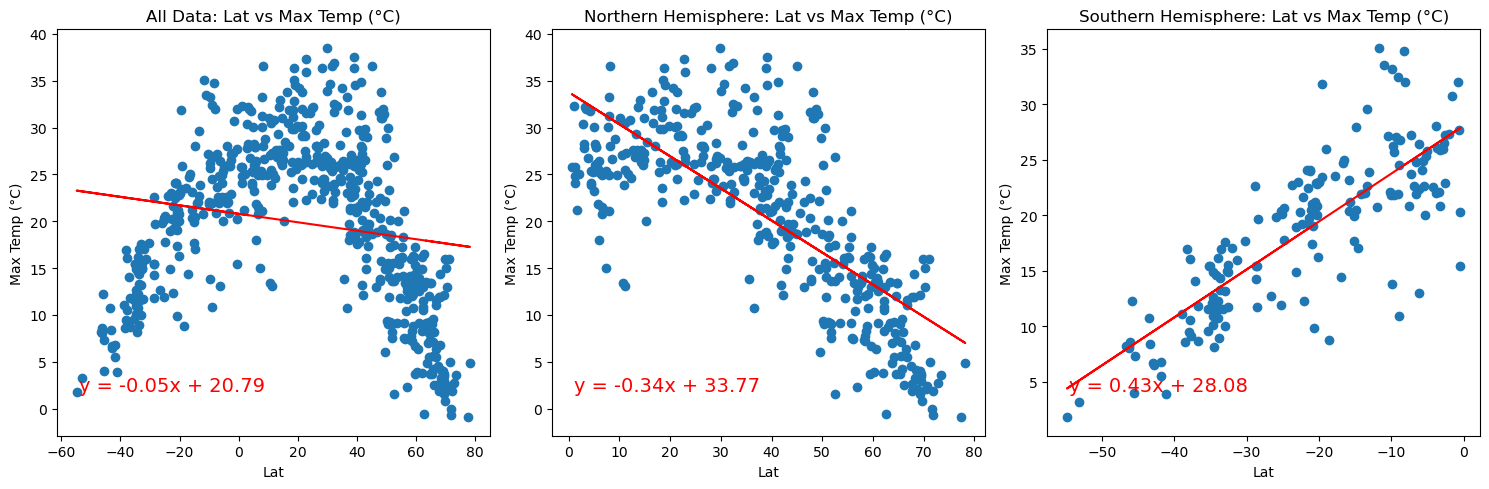

r-value: -0.05
r-value: 0.07
r-value: -0.04


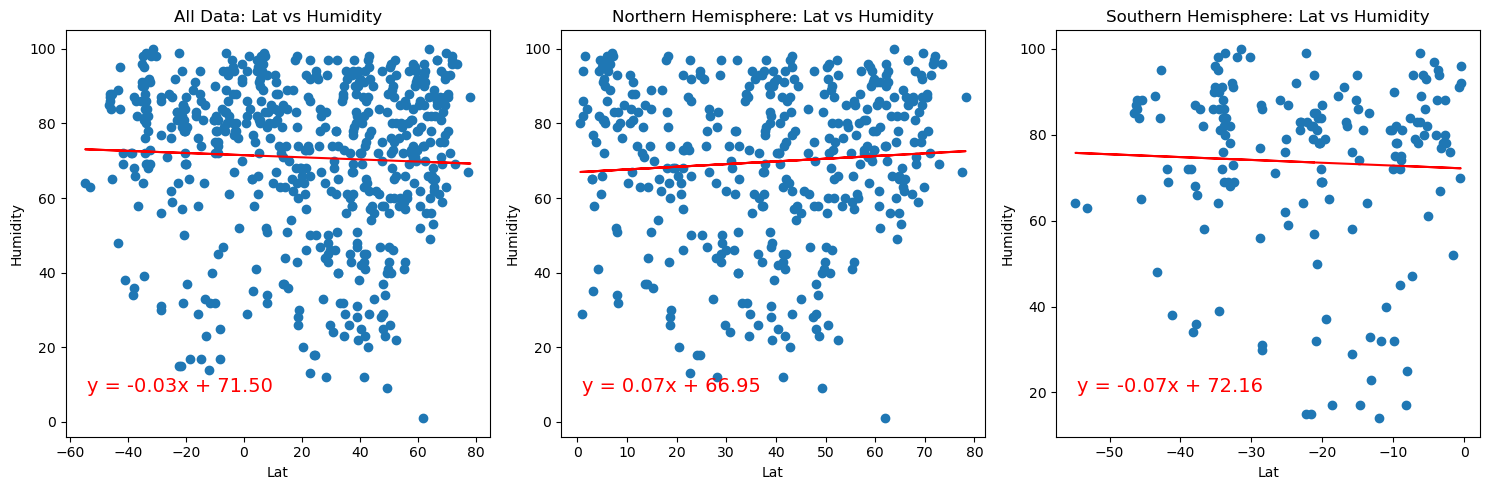

r-value: 0.05
r-value: -0.01
r-value: -0.02


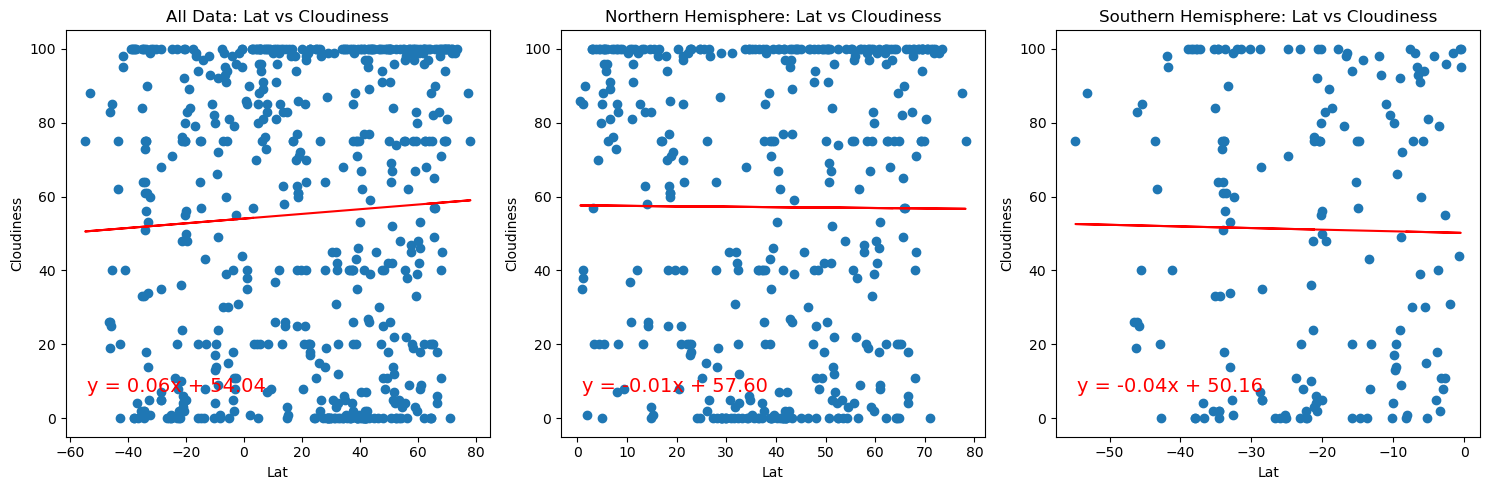

r-value: -0.02
r-value: 0.02
r-value: -0.16


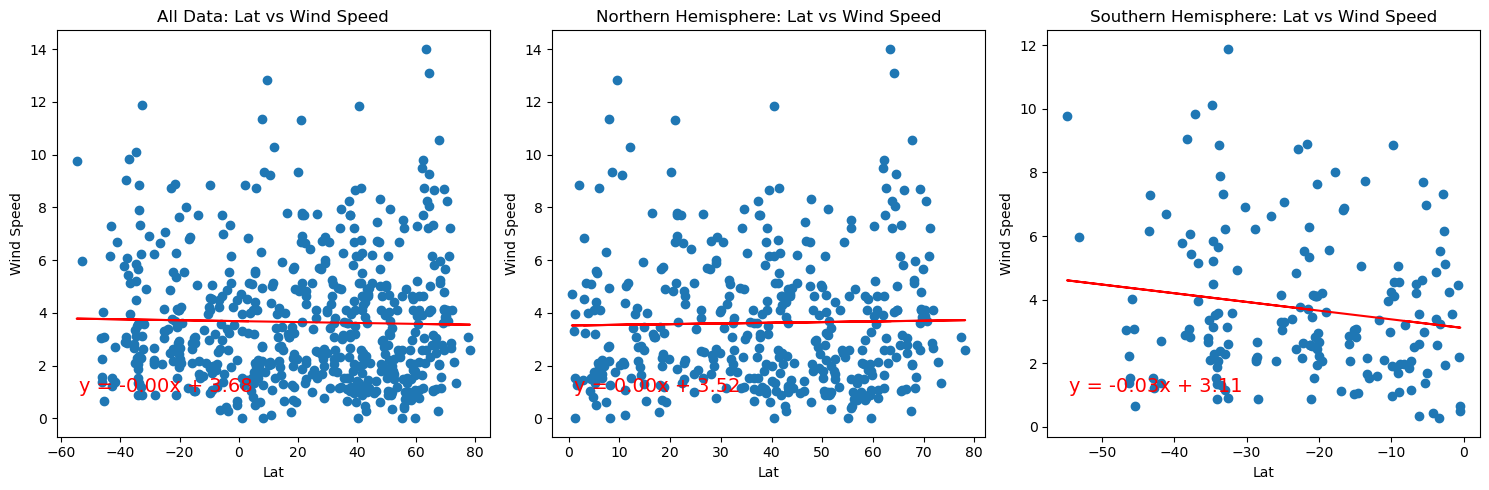

In [33]:
# Split the data into hemispheres
df_northern_hemisphere = df_city_data[df_city_data['Lat'] >= 0]
df_southern_hemisphere = df_city_data[df_city_data['Lat'] < 0]

# Generate plots for Latitude vs. Temperature
generate_plots(df_city_data, df_northern_hemisphere, df_southern_hemisphere, 'Lat', 'Max Temp (°C)')

# Generate plots for Latitude vs. Humidity
generate_plots(df_city_data, df_northern_hemisphere, df_southern_hemisphere, 'Lat', 'Humidity')

# Generate plots for Latitude vs. Cloudiness
generate_plots(df_city_data, df_northern_hemisphere, df_southern_hemisphere, 'Lat', 'Cloudiness')

# Generate plots for Latitude vs. Wind Speed
generate_plots(df_city_data, df_northern_hemisphere, df_southern_hemisphere, 'Lat', 'Wind Speed')